<a href="https://colab.research.google.com/github/Suyash-Mishra3/22BDS0192_EDA-Project/blob/colab-commit/22BDS0192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
print("Dimensions:", df.shape)
print("\nData Types:\n", df.dtypes)
df.info()


Dimensions: (13393, 12)

Data Types:
 age                          int64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13392 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13393 non-n

In [4]:
print("\nSummary Statistics (Numeric):")
print(df.describe())
print("\nSummary Statistics (Categorical):")
print(df.describe(include=['object']))



Summary Statistics (Numeric):
                age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13392.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.257107     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771224   
std       14.714152    

In [8]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)




Missing Values:
 age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Duplicate Rows: 0


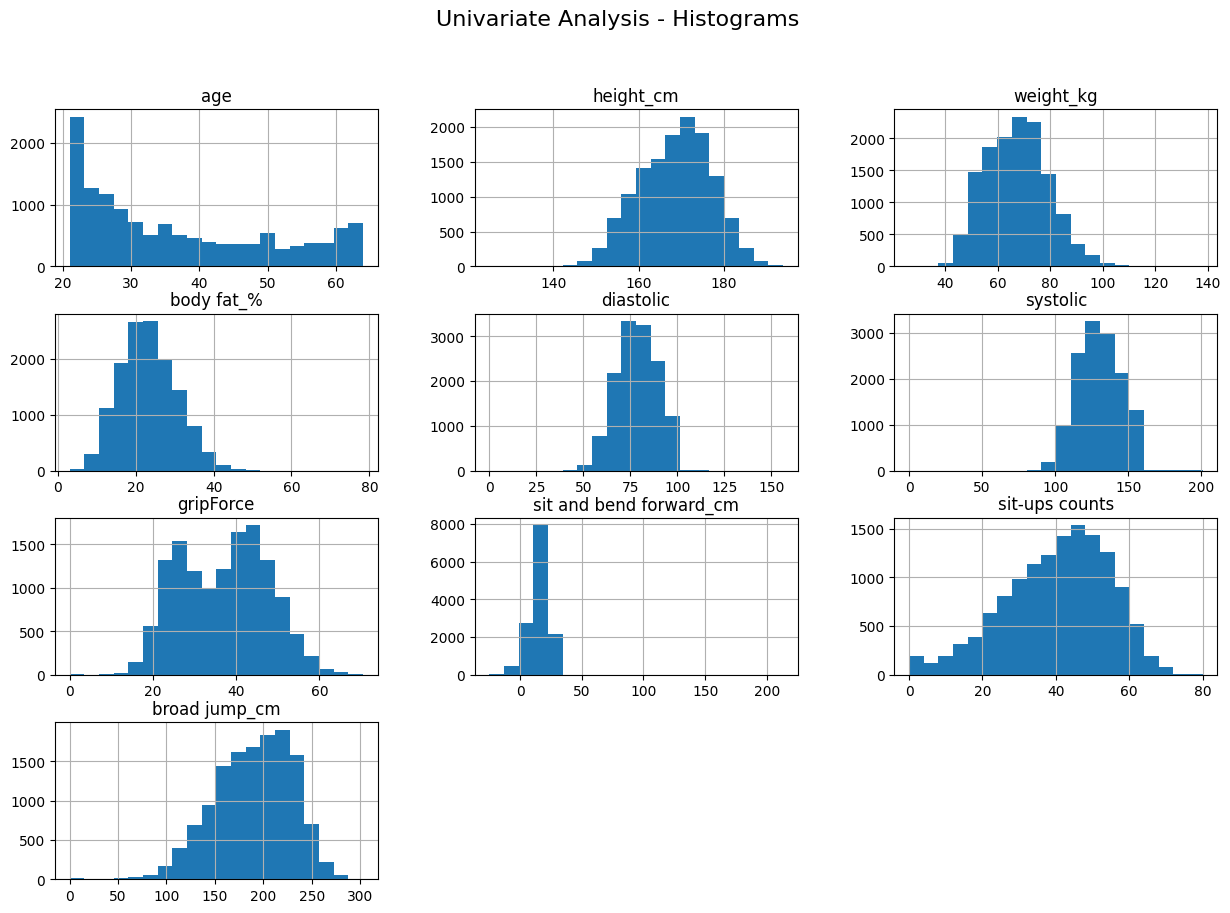

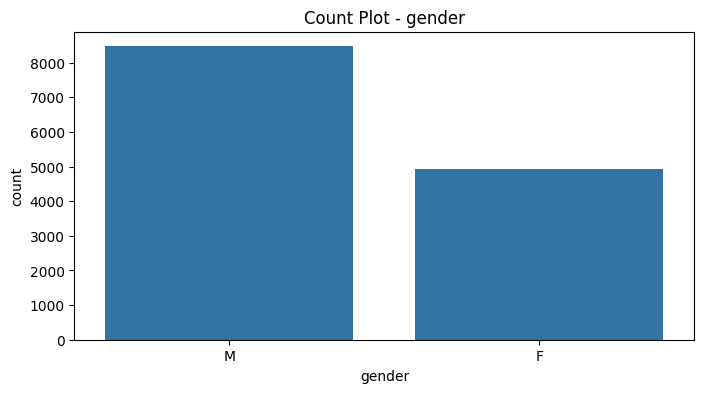

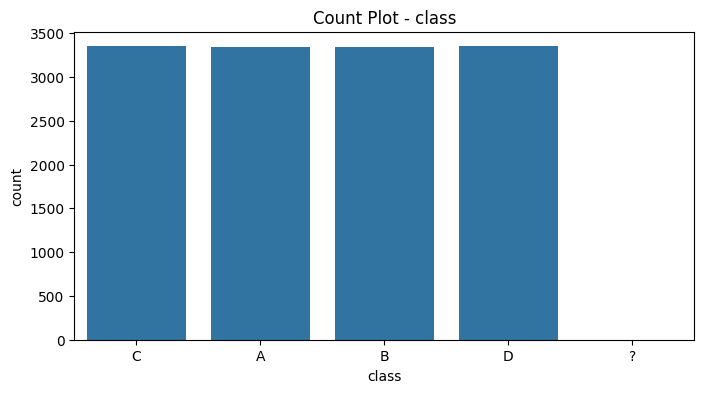

In [9]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Analysis - Histograms", fontsize=16)
plt.show()

# Countplot
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot - {col}")
    plt.show()


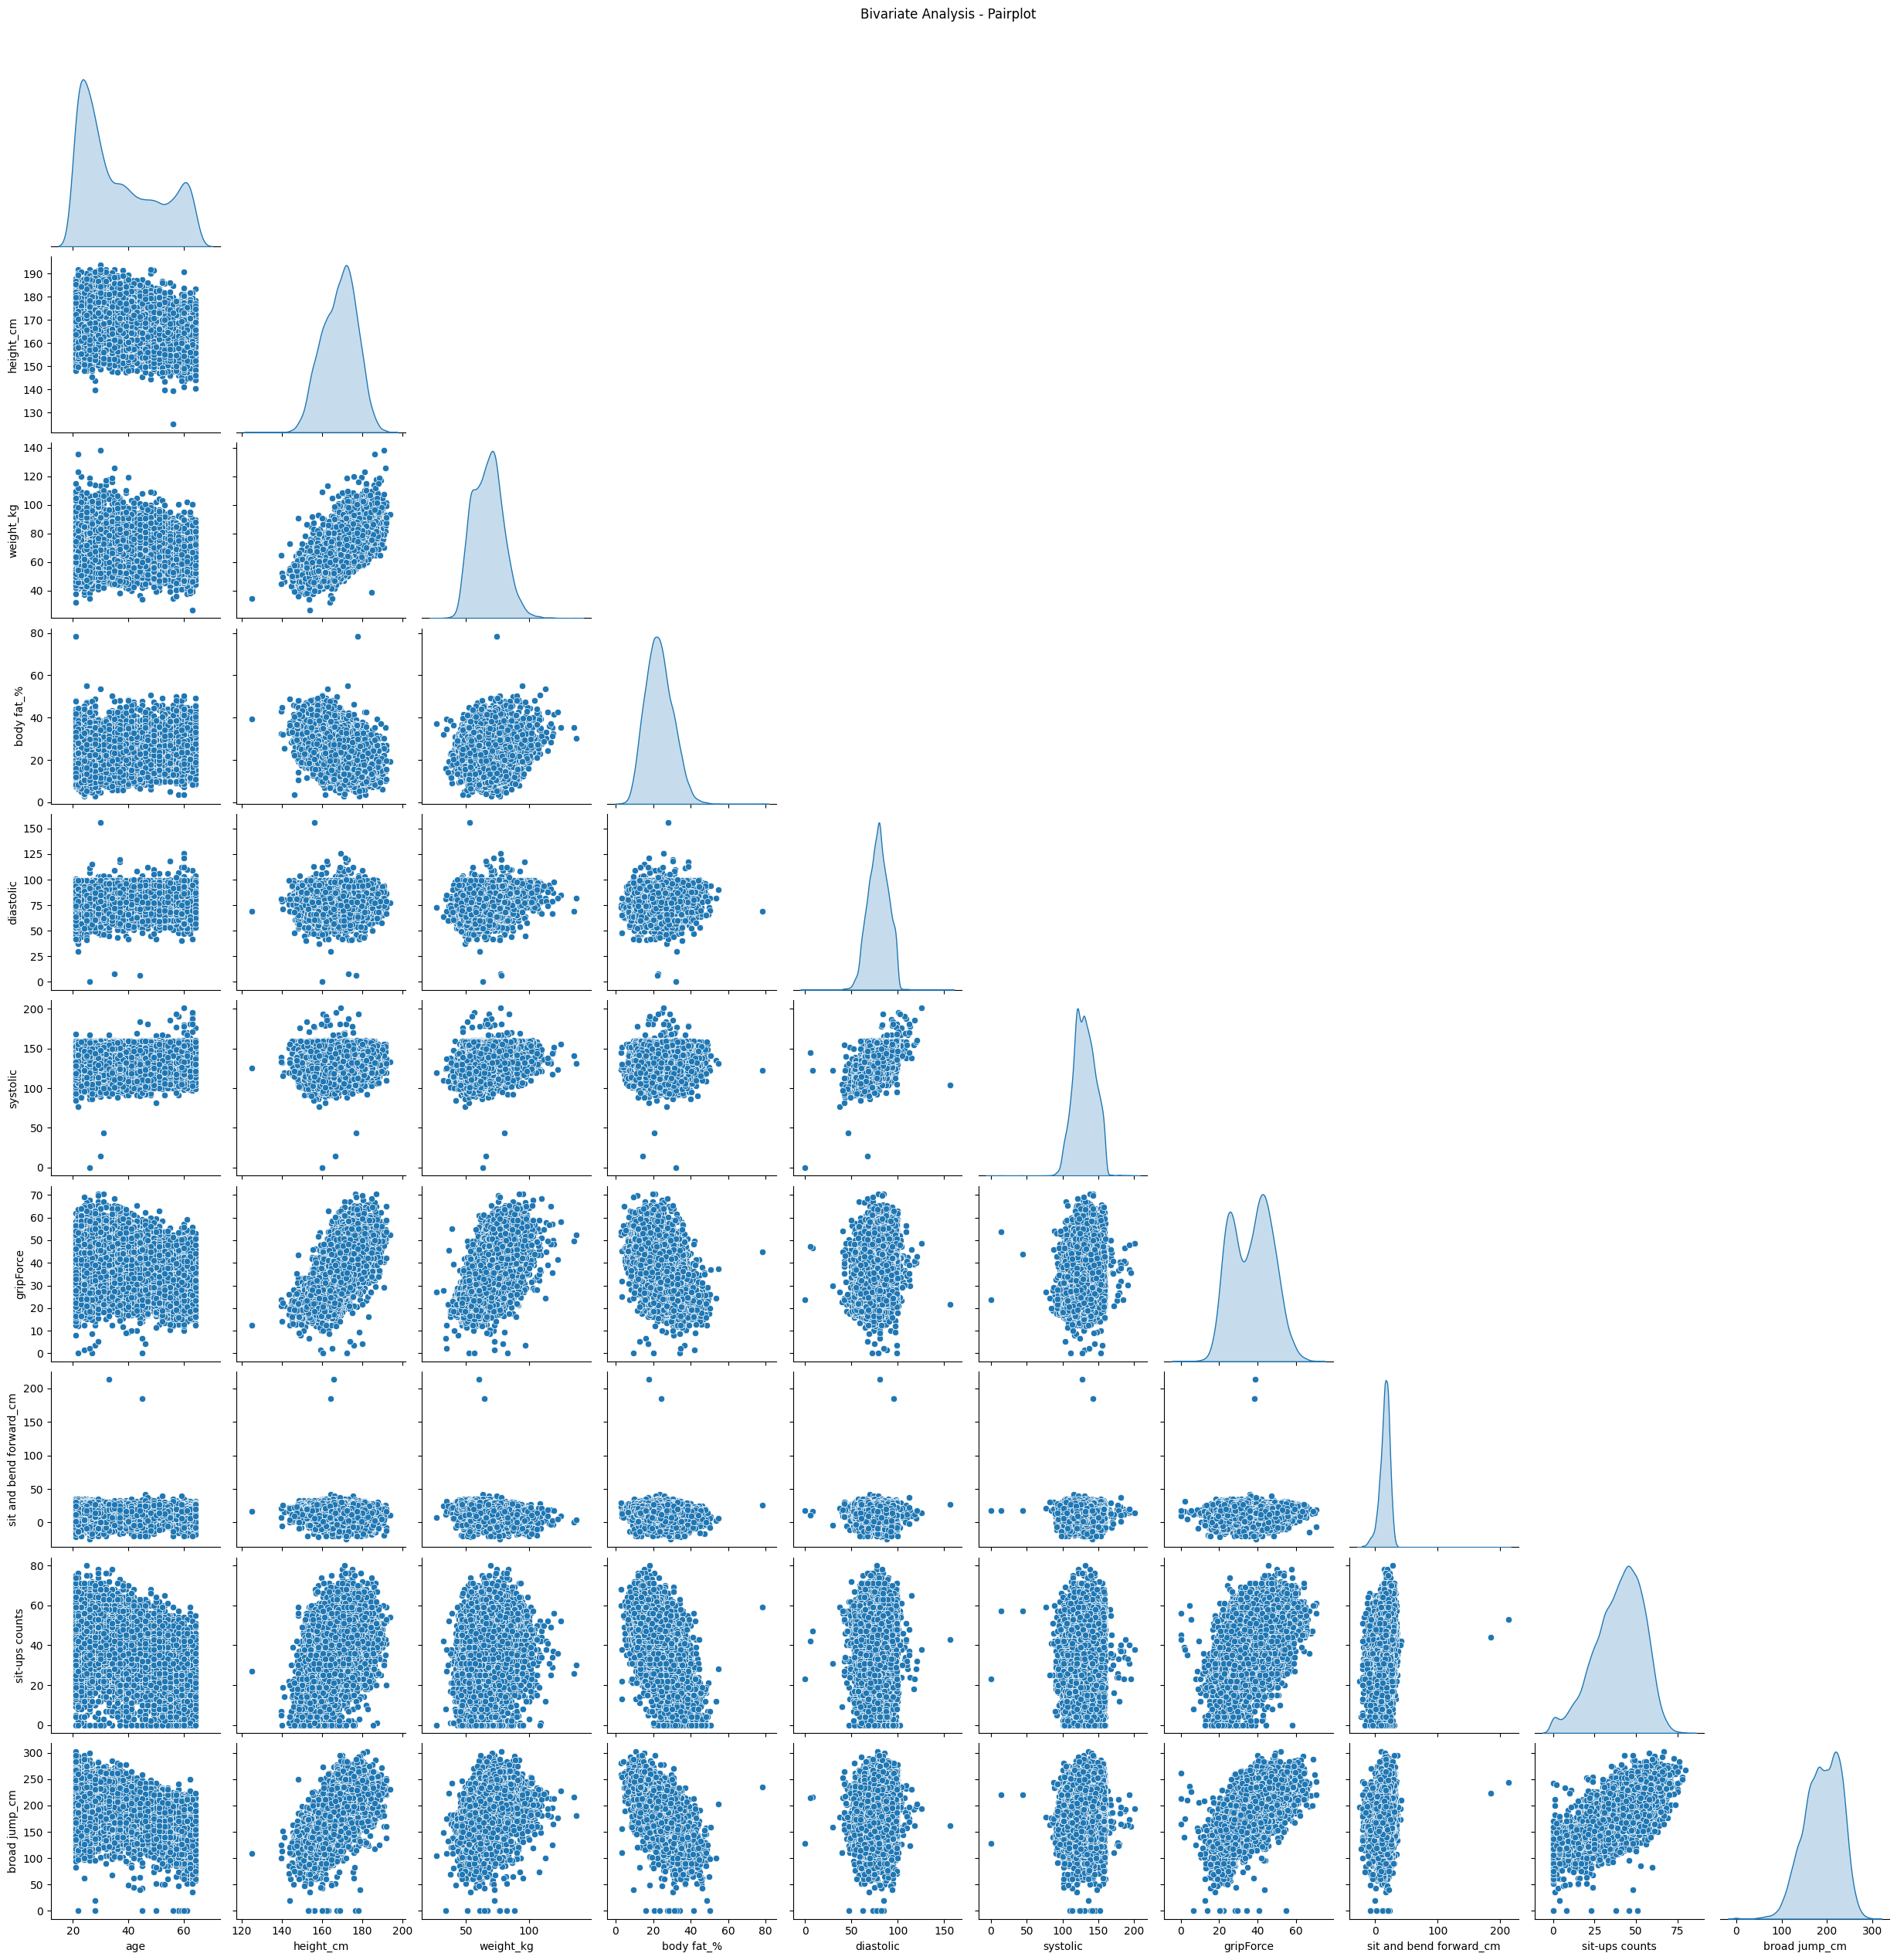

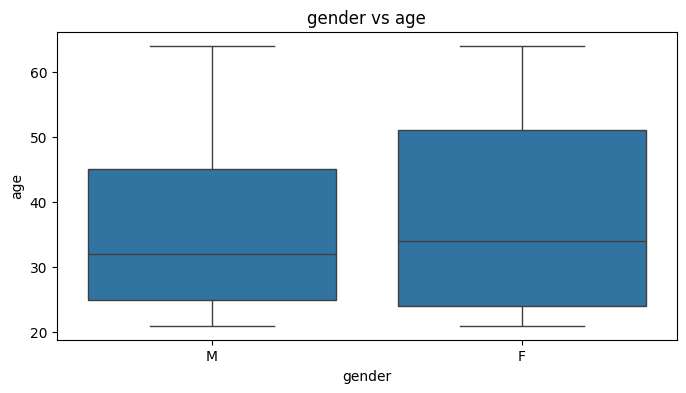

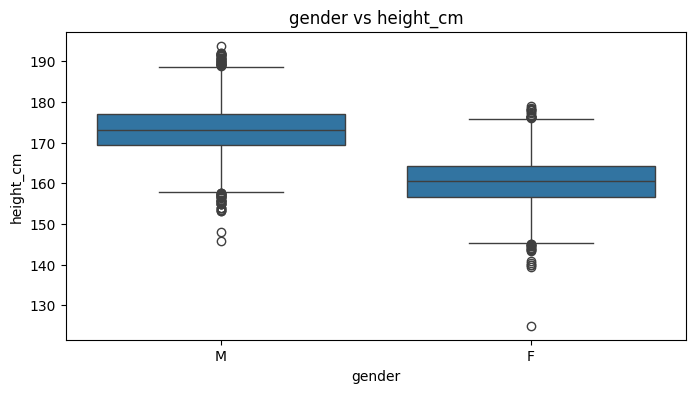

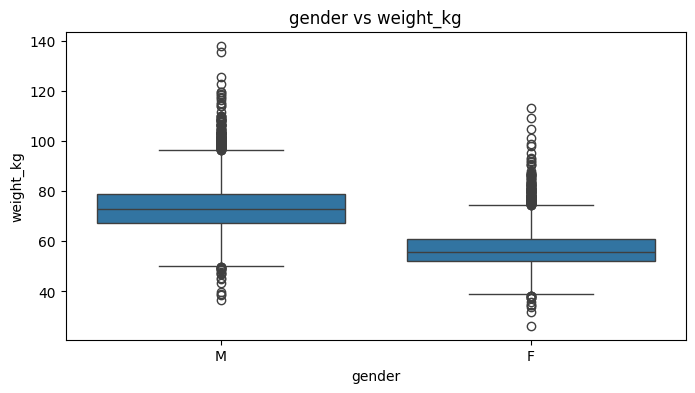

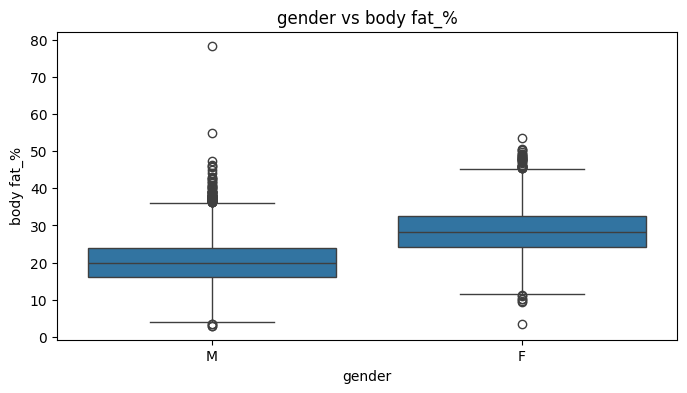

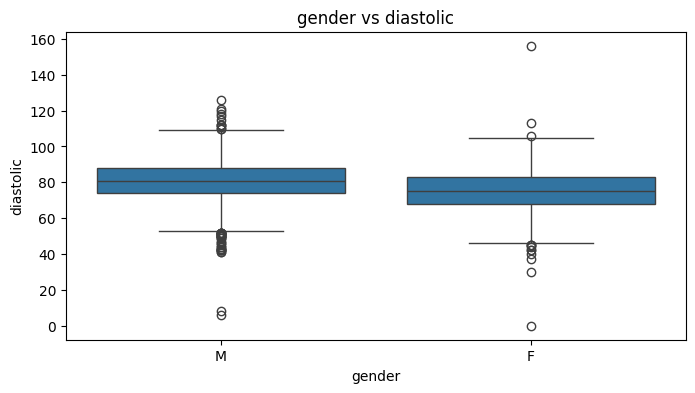

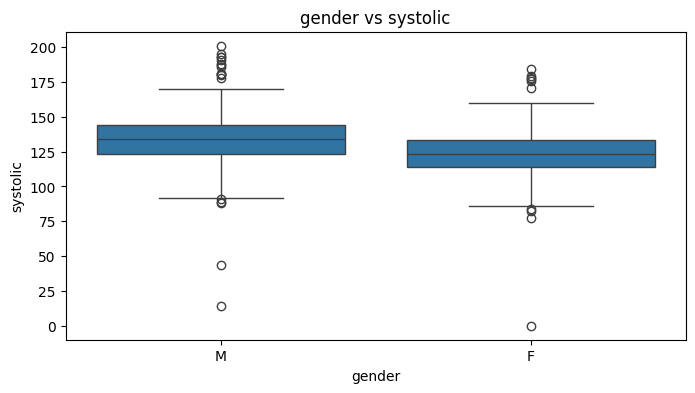

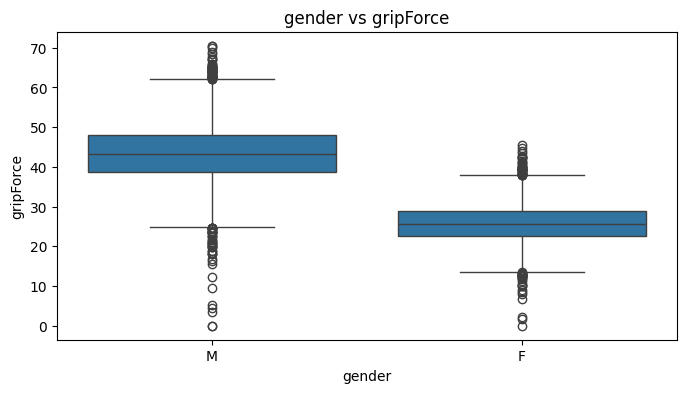

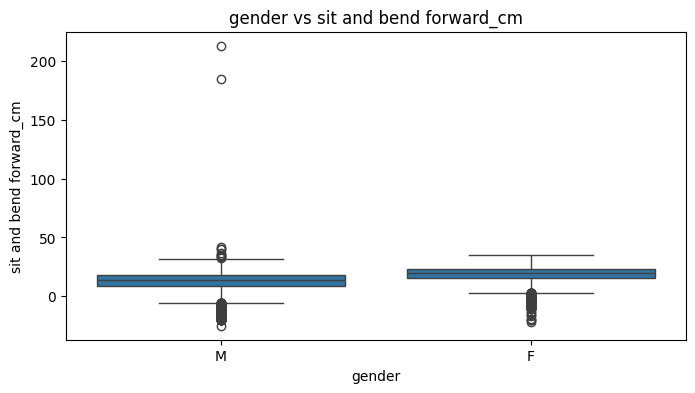

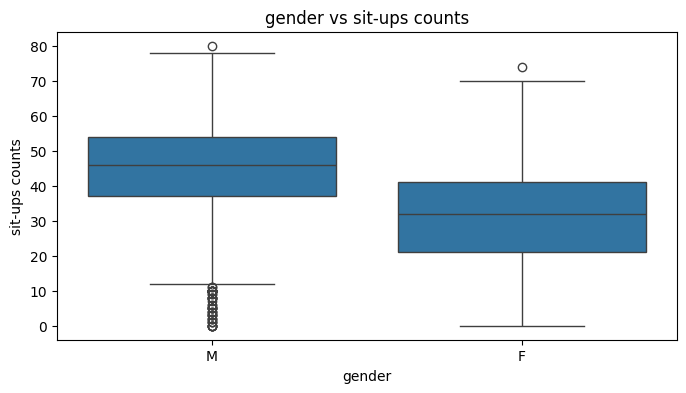

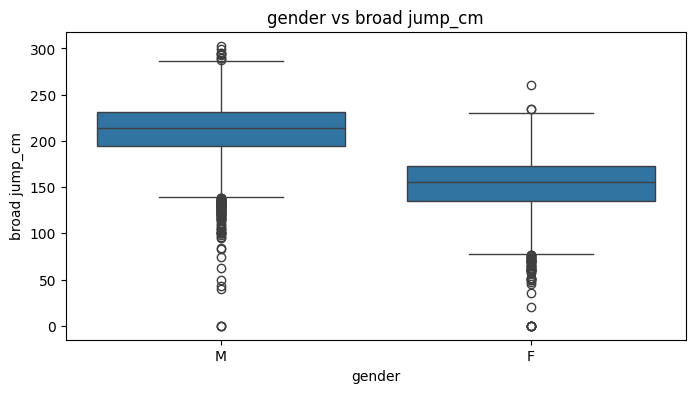

In [10]:
#Bivariate Analysis
# Pairplot
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Bivariate Analysis - Pairplot", y=1.02)
plt.show()

# Boxplot
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=cat_cols[0], y=col)
    plt.title(f"{cat_cols[0]} vs {col}")
    plt.show()


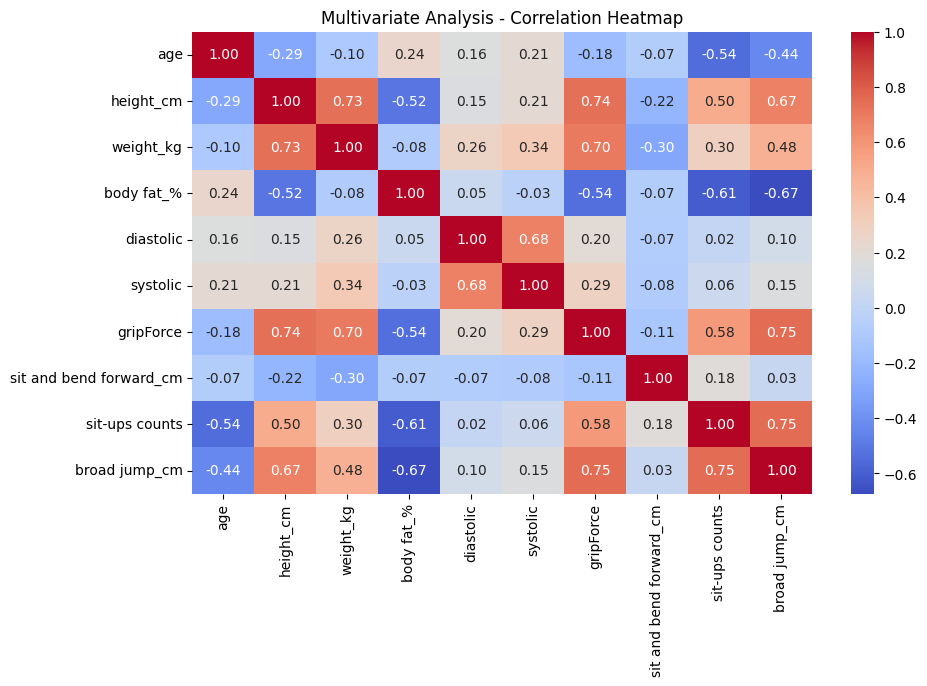

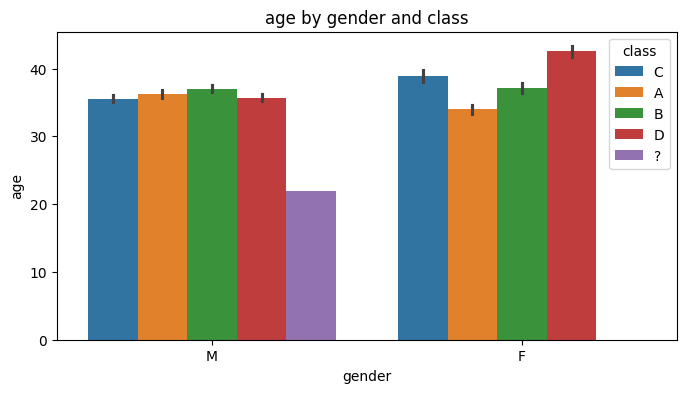

In [13]:
#Mutivariate Analysis
#Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Multivariate Analysis - Correlation Heatmap")
plt.show()

if len(cat_cols) >= 2:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x=cat_cols[0], y=num_cols[0], hue=cat_cols[1])
    plt.title(f"{num_cols[0]} by {cat_cols[0]} and {cat_cols[1]}")
    plt.show()
